<a href="https://colab.research.google.com/github/JinLeeGG/Python_CodingTest/blob/main/(Day11)%20Hash%2C%20Hash%20Function/CodingExample/Hash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사과 4개, 바나나 11개, 귤 7개 ⇒ 이 내용을 어떻게 데이터로 구성 가능할까?
fruit = {'Apple' : 4, 'Banana' :2,  'mandarin' : 7 }
fruit['Apple']

for i in fruit:
  print(fruit[i])

4
2
7


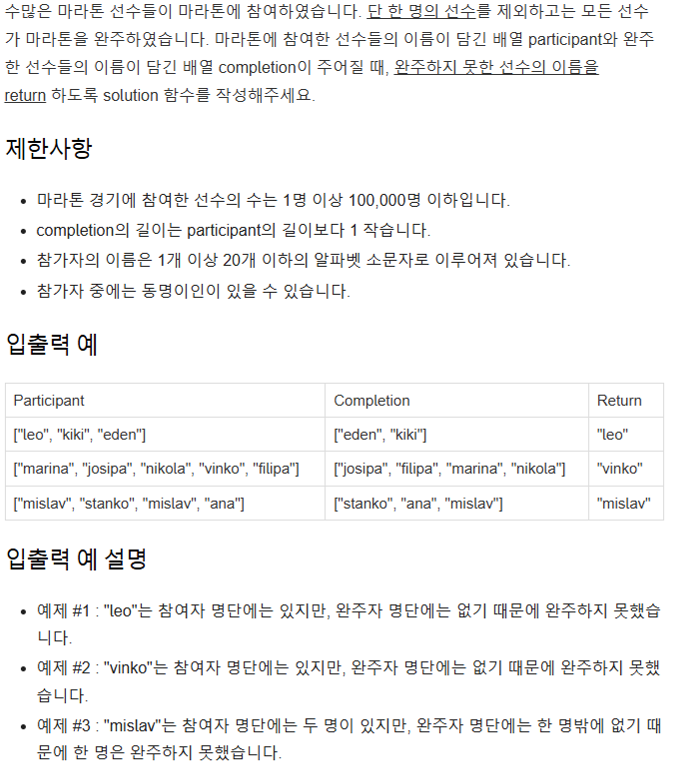

In [ ]:
'''
핵심
1. 동명이인 --> 어떠한 방식으로 구분
2. 완주하지 못한 선수가 한명만 존재

푸는 방법:
1. 정렬(배열화 한다.)
2. 완주자 배열을 기준으로 처음부터 끝까지 돌면서 비교
3. 해시를 사용
'''

# 소거법을 이용해서 푸는방법
# 하지만 전체 리스트를 검색해야함으로 동명이인을 처리 못한다.

a = ["leo", "kiki", "eden"]
b = ["eden", "kiki"]

def solution(part, compl):
    for item in compl:
        part.remove(item)

    return part[0]

solution(a, b)

'leo'

In [ ]:
# 정렬을 이용하여 코딩
# 동명이인을 만족 못한다.

a = ["leo", "kiki", "eden"]
b = ["eden", "kiki"]

def solution(part, compl):
    part.sort()
    compl.sort()
    for i in range(len(compl)):
        if(part[i] != compl[i]):
          return part[i]

    return part[-1]

solution(a, b)

'leo'

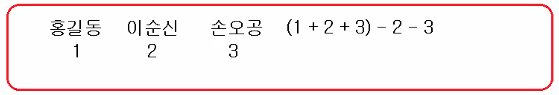

In [ ]:
# 해시 테이블을 사용한다면 다음과 같은 규칙이 존재한다.
# 1. 동명 이인일경우 딕셔너리에서 해당 값을 불러온뒤 1을 더하는 방식을 취한다.
# 2. 그리고 나서 완주자 리스트에서 동일한 방법으로 1을 뺀다.

a = ["kiki", "kiki", "eden"]
b = ["eden", "kiki"]

def solution(part, compl):
    result = {}

    for i in part:
        result[i] = result.get(i, 0) + 1

    for j in compl:
        result[j] -= 1

    for k in result:
        if result[k]:
            return k

solution(a, b)

'kiki'

In [ ]:
# 해시를 이용한 문제풀이2

a = ["kiki", "kiki", "eden"]
b = ["eden", "kiki"]

def solution(part, compl):
    value = 0
    result = {}

    for i in part:
        result[hash(i)] = i     # 참가자의 값을 불러와서 해시 값을 넣어주면 된다.
        value += int(hash(i))
    for com in compl:
        value -= hash(com)

    return result[value]

solution(a, b)

'kiki'

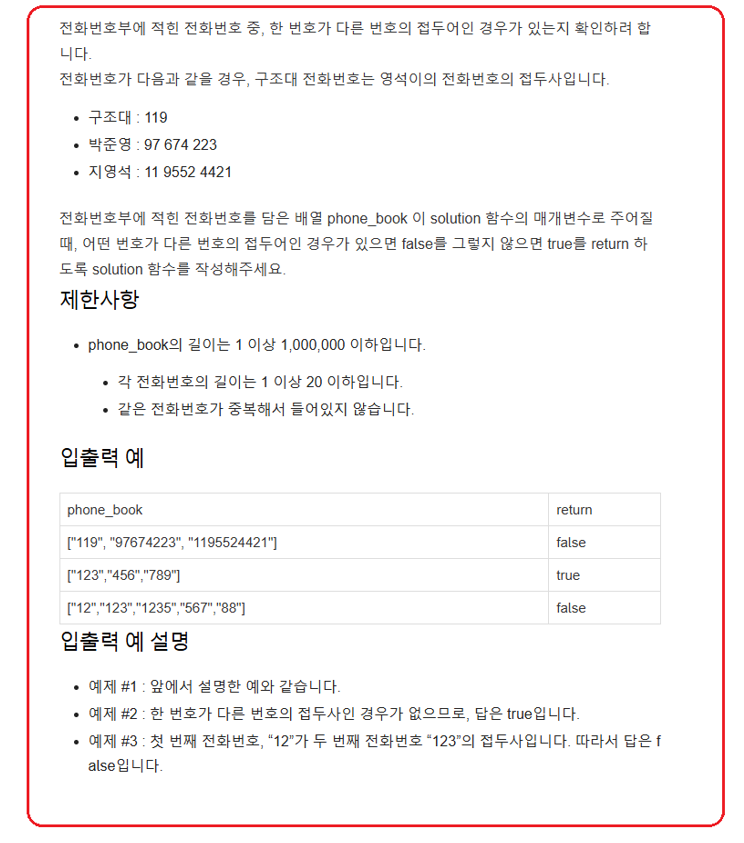

In [ ]:
# My answer
a = ["119", "97674223", "1195524421"]

def solution(phone_book):
    value = 0
    for i in phone_book:
        if phone_book[i].startswith(phone_book[i+1]):
            return True
        else:
            return False



    print(value)

solution(a)

TypeError: list indices must be integers or slices, not str

In [ ]:
# Solution 1

a = ["119", "97674223", "1195524421"]

def solution(phone_list):
    firsts = {}

    for phone_number in phone_list:
        firsts[phone_number] = 1

    for phone_number in phone_list:
        first = ''
        for number in phone_number:
              first += number
              if first in firsts and first != phone_number:
                  return False

    return True

solution(a)

False

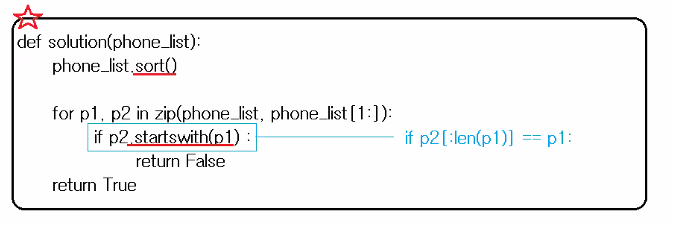

In [ ]:
# solution 2

a = ["119", "97674223", "1195524421"]

def solution(phone_list):
    phone_list.sort()

    for p1, p2 in zip(phone_list, phone_list[1:]):
        if p2.startswith(p1):                              # if p2[:len(p1)] == p1:
            return False

    return True

solution(a)

False

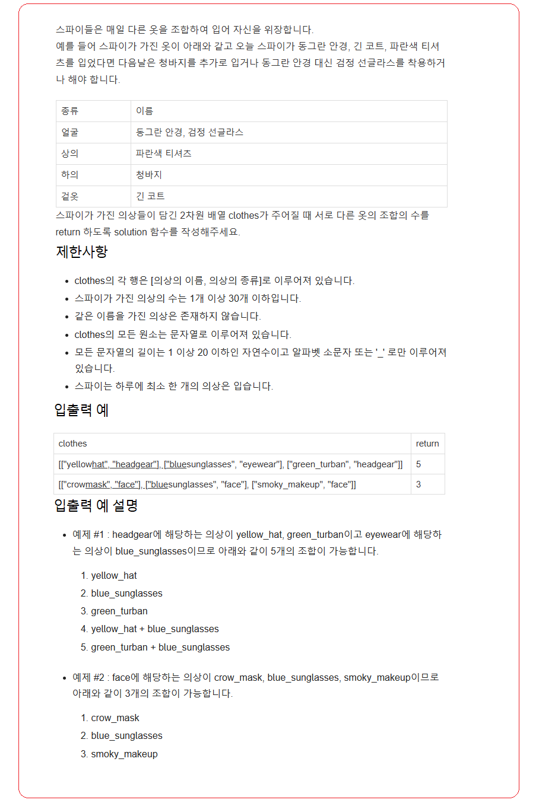

In [ ]:
# my solution

a = [["yellowhat", "headgear"], ["bluesunglasses", "eyewear"], ["green_turban", "headgear"]]
# count each item
# count combinations of different kind of items
# add two counts

def solution(clothes):
    n = {}
    d = dict(clothes)
    count = 0

    for val in d.values():
        if val in n:
            n[val] +=1
            count +=1
        else:
            n[val] = 1
            count += 1


solution(a)



In [ ]:
# solution

a = [["yellowhat", "headgear"], ["bluesunglasses", "eyewear"], ["green_turban", "headgear"]]

def solution(clothes):
    answer = 1
    cloth_kind = {}

    for cloth, types in clothes:
          cloth_kind[types] = cloth_kind.get(types, 0) +1

    for types in cloth_kind:
          answer *= (cloth_kind[types] + 1)

    return answer-1



solution(a)

5

# 카카오 블라인드 채용 시험문제
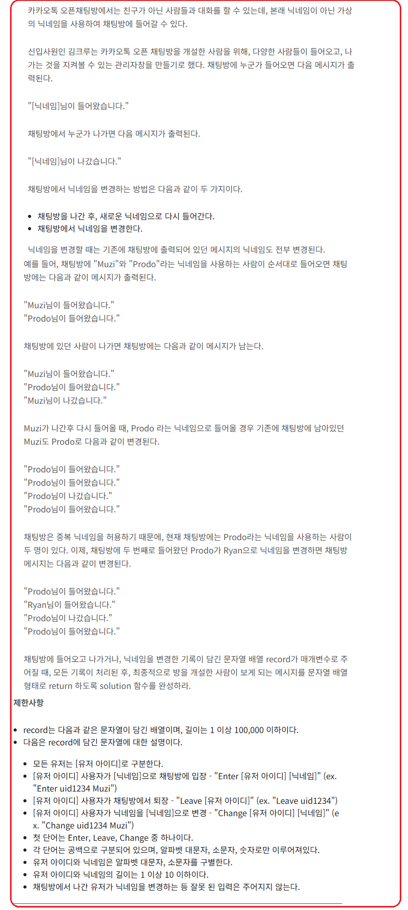


In [ ]:
# my answer
def solution(record):
  for i in record:
    if i[0] == "E":




record = [
    "Enter uid1234 Muzi",
    "Enter uid4567 Prodo",
    "Leave uid1234",
    "Enter uid1234 Prodo",
    "Change uid4567 Ryan"
]
print(solution(record))

Enter uid1234 Muzi
Enter uid4567 Prodo
Leave uid1234
Enter uid1234 Prodo
Change uid4567 Ryan
None


In [141]:
record = [
    "Enter uid1234 Muzi",
    "Enter uid4567 Prodo",
    "Leave uid1234",
    "Enter uid1234 Prodo",
    "Change uid4567 Ryan"
]

def solution(record):
  answer = []     # 정답 배열
  actions = []    # 모든 일이 일어난 로그 (커맨드, 닉네임) 퓨플 형태로 저장
  user = {}       # {유저 아이디: 닉네임} 으로 저장

  for event in record:             # record 안에 있는 event마다
      info = event.split()            # info 안에 리스트 형태로 각 키워드를 저장 ex) ['Enter', 'uid1234', 'Muzi']
      cmd, uid = info[0], info[1]     # cmd 안에는 "Enter, Change, Leave" 커맨드 형태를 저장하고, uid 안에는 "uid4567" 등 유저 아이디를 저장
      if cmd in ("Enter", "Change"):  # 만약 cmd가 ("Enter", "Change") 중 하나라고 하면,
          nick = info[2]                  # nick 안에 닉네임을 저장
          user[uid] = nick                # user 딕셔너리안에 uid를 키(key)값, nick값을 값(Value)으로 설정
      actions.append((cmd, uid))           # action 안에는 튜플 형태로 (커맨드값, 닉네임) 을 저장. 즉 전체적으로 일어난 모든 일을 저장 (log)

  # action (로그) 안에 있는걸 하나씩 꺼내서
  for action in actions:
      # cmd, uid 형태로 action 안에 들어있는 (커맨드값, 닉네임)을 나누어서 저장
      cmd, uid = action
      # 만약 cmd가 Enter 이면 유저가 방에 입장했다는 뜻임으로
      if cmd == 'Enter':
          # answer 배열 안에 'user[uid]님이 입장.' 형태로 추가
          answer.append(f'{user[uid]}님이 입장.')
      # 만약 cmd가 Enter 이면 유저가 방에서 나갔다는 뜻임으로
      elif cmd == 'Leave':
          # answer 배열 안에 'user[uid]님이 나감.' 형태로 추가
          answer.append(f'{user[uid]}님이 나감.')


  # 마지막으로 정답 배열을 출력
  return answer

print(solution(record))


['Prodo님이 입장.', 'Ryan님이 입장.', 'Prodo님이 나감.', 'Prodo님이 입장.']
